In [76]:
%reset

In [77]:
# Importing the libraries
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle

![Zadatak](assignment.png "Zadatak")

#### **Pomaci središnjih katova:**
${{{d^2}{x_i}} \over d{t^2}}= {k({x_{i-1}} - 2{x_i} + {x_{i+1}}) + {F_f}(\dot{x}_i)}$

#### **Prizemlje zgrade vezano na pobudu tla (amplituda i frekvencija potresa):**
${{{d^2}{x_1}} \over d{t^2}}= {k(- 2{x_1} + {x_2}) + {F_f}(\dot{x}_1) + Asin(\omega t)}$
- $Asin(\omega t)$ -> Podrhtavanje tla

#### **Pomak zadnjeg kata:**
${{{d^2}{x_N}} \over d{t^2}}= {k({x_{N-1}} - 2{x_N}) + {F_f}(\dot{x}_N)}$

#### **${F_f}(\dot{x})$ trenje između katova je definirano:**
$ {F_f}(\dot{x}) =
    \begin{cases}
    -F_0    & \quad \dot{x} > 0\\
    +F_0    & \quad \dot{x} < 0\\
    kx     & \quad \dot{x} = 0, kx \leq F_0\\
    {F_0 x} \over |x|     & \quad \dot{x} = 0, kx \geq F_0
    \end{cases}
$

Approximate Energy of Earthquake per Magnitude:

![Energy per Magnitude](EnergyPerMagnitude.png "Energy per Magnitude")

----

#### Literature:
1. [Learning Differential Equations by Exploring Earthquake Induced Structural Vibrations: A Case Study*](https://www.ijee.ie/articles/Vol15-6/ijee1107.pdf)

In [78]:
# Parameters
k = 0.001  # Overall stiffness of a building
F0 = 0.00001  # Friction force

# Bezveze
A = 2 # m; Amplitude of a floor
omega = 0.01 # rad/s; Frequency of a floor

# Friction between floors definition
def F_f(v, x): # v = velocity = derivation of x
    if v > 0:
        return -F0
    elif v < 0:
        return F0
    elif v == 0 and k*x <= F0:
        return k*x
    elif v == 0 and k*x > F0:
        return ((F0)*x)/np.abs(x)

# # Frequency of the earthquake
# def potres(t):
#     # print(t)
#     if t <= 5:
#         return A*np.sin(omega*t)
#     else:
#         return 0

In [79]:
testing_F0 = np.arange(5, 100*10**4, 2.5)

Vel_x:  4
Min_x:  -0.0 
Max_x:  3.706
Passed! | F0 = 1e-05




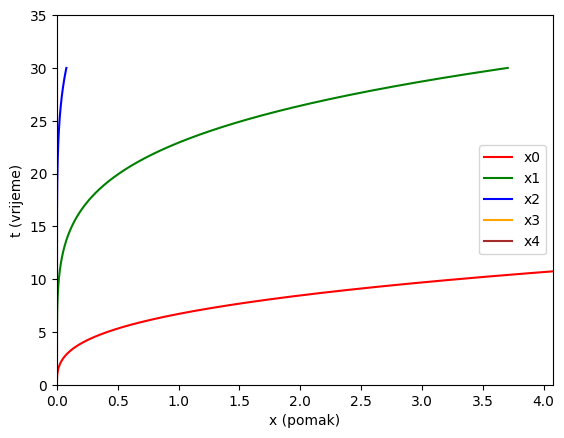

In [80]:
try:
    # Function that calculates the right sides of the differential equations
    def D(X, t):
        # print(f"F_f: {F_f(X[4], X[0])}")
        # X0, X1, X2, X3, X4, V5, V6, V7, V8, V9 = X
        return np.array([X[5],
                        X[6],
                        X[7],
                        X[8],
                        X[9],
                        k*(-2*X[0] + X[1]) + F_f(X[5], X[0]) + A*np.sin(omega*t),                   # Ground floor
                        k*(X[0] - 2*X[1] + X[2]) + F_f(X[6], X[1]),                                 # First floor      
                        k*(X[1] - 2*X[2] + X[3]) + F_f(X[7], X[2]),                                 # Second floor       
                        k*(X[2] - 2*X[3] + X[4]) + F_f(X[8], X[3]),                                 # Third floor
                        k*(X[3] - 2*X[4]) + F_f(X[9], X[4])])

    # Initial state
    X0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

    # Time interval
    t_stop = 30 # Mag. 5-6 earthquake lasts up to 30 seconds
    nt = t_stop*30 # Number of time steps

    T = np.linspace(0, t_stop, nt)

    # Integration
    X = odeint(D, X0, T)
    
    # Graphs - x
    vel_x = int(len(X[0, :])/2) - 1
    print('Vel_x: ', vel_x)
    min_x = np.around(np.min(X[:, 1:vel_x]), decimals=3)
    max_x = np.around(np.max(X[:, 1:vel_x]), decimals=3)
    print('Min_x: ', min_x, '\nMax_x: ', max_x)
    plt.xlim(min_x*1.2, max_x*1.2)
    plt.ylim(0, t_stop+5)
    plt.plot(X[:, 0], T, label='x0', color='red') # Ground floor
    plt.plot(X[:, 1], T, label='x1', color='green')
    plt.plot(X[:, 2], T, label='x2', color='blue')
    plt.plot(X[:, 3], T, label='x3', color='orange')
    plt.plot(X[:, 4], T, label='x4', color='brown')
    plt.xlabel('x (pomak)')
    plt.ylabel('t (vrijeme)')
    plt.legend()
    
    # Printing values
    print(f'Passed! | F0 = {F0}')
    # Save value to a file
    # with open('values_passed.txt', 'a') as f:
    #     f.write(f'{F0}\n')
except ValueError:
    # Printing values
    print(f'Failed! | F0 = {F0}')
    # Save value to a file
    # with open('values_failed.txt', 'a') as f:
    #     f.write(f'{F0}\n')
print('\n')

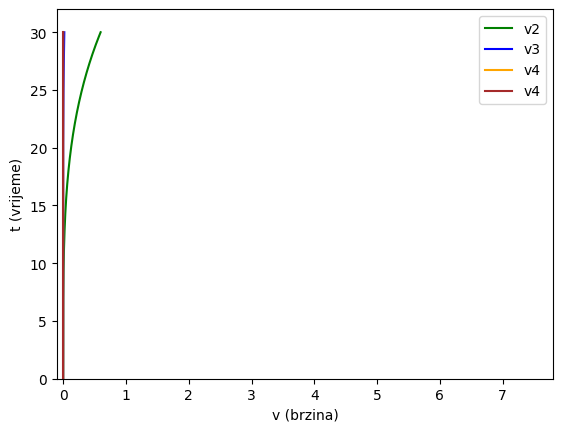

In [81]:
# Graphs - v
vel_x = int(len(X[0, :])/2) - 1
print('Vel_x: ', vel_x)
min_x = np.around(np.min(X[:, 1:vel_x]), decimals=3)
max_x = np.around(np.max(X[:, 1:vel_x]), decimals=3)
print('Min_x: ', min_x, '\nMax_x: ', max_x)
plt.xlim(min_x*1.2, max_x*1.2)
plt.ylim(0, t_stop+5)
# plt.plot(X[:, 5], T, label='v1', color='red') # Ground speed
plt.plot(X[:, 6], T, label='v2', color='green')
plt.plot(X[:, 7], T, label='v3', color='blue')
plt.plot(X[:, 8], T, label='v4', color='orange')
plt.plot(X[:, 9], T, label='v4', color='brown')
plt.xlabel('v (brzina)')
plt.ylabel('t (vrijeme)')
plt.legend()

In [82]:
# # Animation

# fig, ax = plt.subplots()
# def frames(i):
#     plt.clf()
#     plt.xlim(0, 10)
#     plt.ylim(-1, 32)
#     ax = plt.gca()
#     ax.add_patch(Rectangle((0, -1), 10, 1, color='green'))
#     ax.add_patch(Rectangle((2.5 + X[i,0], 0), 5, 6, color='red', label='Floor 1'))
#     ax.add_patch(Rectangle((2.5 + X[i,1], 6), 5, 6, color='green', label='Floor 2'))
#     ax.add_patch(Rectangle((2.5 + X[i,2], 12), 5, 6, color='blue', label='Floor 3'))
#     ax.add_patch(Rectangle((2.5 + X[i,3], 18), 5, 6, color='orange', label='Floor 4'))

# animation = FuncAnimation(fig, frames, frames=nt) # Create an animation with a total of nt frames
# animation.save('Animacija.avi', fps=(nt)/t_stop) # Save the animation as a video file (avi)

In [83]:
np.shape(X)

(900, 10)